<a href="https://colab.research.google.com/github/sakuronohana/cas_datenanalyse/blob/master/Semesterarbeit/CAS_DA_SA_Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img 
src="https://www.ffhs.ch/templates/ffhs/img/logo@2x.png" width="100"> 
###DaAn, Data Analysis, MAS/CAS Web4B 2018, ZH1, FS19, Dr. Tödtli Beat###

##*Semesterarbeit von Patrik Di Lena*##
#Betrugserkennung Zahlungsverkehr#



##Ziel##
Das Ziel dieser Semesterarbeit ist die Gegenüberstellung von Supervised und Unsupervised Lernverfahren mit Hilfe neuronaler Netzwerk Algorithmen. Dabei kommt  ein nicht gelabelter und ein gelabelter Datensatz aus einem Betrugserkennungssystem zum Einsatz. 

##Aufgabenstellung##
###Erkennung von Betrugszahlungen###
Mittels Unsupervised Learning sollen Betrugszahlungen aus einem nicht gelabelten Datensatz erkannt und die Effiktivität des vorhandenen Fraud-Detection Systems geprüft werden. In diesem Fall wird ein Autoencoder Neural Network mit Tensorflow aufgebaut. 

###Betrugsanfällige Risikogruppen###
Mit Hilfe von Supervised Learning werden mögliche Risikogruppen ermittelt, welche im Visier von Betrügern stehen.  Auf Basis eines gelabelten Datensatzes  werden die Risikogruppen nach folgenden Merkmalen unterschieden:

*	Geschlecht
*	Alter
*	Zivilstand
*	Nationalität
*	Kontosaldo
*	Wohnort
*	Region

In diesem Fall wird der Deep Learning Algorithmus Convlutional Neural Network zum Einsatz kommen.

##Datensatz##
Die im Rahmen dieser Semesterarbeit verwendeten Daten entstammen, von ihrer Datenstruktur her, aus einem bereits eingesetzten nicht ML-basierten Betrugserkennungssystem. Die Datenwerte wurde zu Wahrung der datenschutzrechtlichen und bankengesetzlichen Aspekte mit Hilfe eines Python-Scripts künstlich erzeugt und beinhalten somit keine reale Zahlungs- oder Kunden-Informationen.   

Datenselektion:

- 20'800 synthetische Kunden (Vorname, Name, Strasse, Ort, Kanton, Sprachregion, Geschlecht, Alter, Zivilstand,  Nationalität, Kontonummer, Vertragsnummer, Rechtsform)

- 60'000 synthetische Zahlungen (Transaktionsid, ,Erstellungdatum/Zeit, Empfängerkonto, Empfängerbank, Empfängerland, Währung, Betrag, Valuta Datum)








#Erkennung von Betrugszahlungen# 

##Unsupervised Learning mit neuronalen Netzwerken##

###Importieren der ungelabelten Fraud-Zahlungsdaten###

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Laden der 600000 nicht gelabelten Transaktionsdaten 
trx_data_url = 'https://raw.githubusercontent.com/sakuronohana/cas_datenanalyse/master/Semesterarbeit/Dataset/trx_data_ol.csv'

trx_data_ol = pd.read_csv(trx_data_url, delimiter=';')
trx_data_ol.head()



,timestamp,paym_id,send_bc_nr,amount,rcv_bc_nr,rcv_bc_iban,rcv_bc_country,rcv_bc_code,rcv_iban,valuta_date,cust_vertrag_nr,cust_konto_nr,cust_vname,cust_nname,cust_plz,cust_ort,cust_kanton,cust_sprachregion,cust_auth_device
0,01.01.18 08:00,10000010,CHBANK71XXX,15368,JOBANK40XXX,JO02SCBL1260000000018525836101,Jordanien,JO,JO40002096331755419,01.01.18 08:00,76311,CH5300772672529640195,Martin,Bader,6020,Emmenbrücke,LU,de,mtan
1,01.01.18 08:00,10000011,CHBANK71XXX,89137,STBANK68XXX,ST23000200000289355710148,Sao Tome und Principe,ST,ST68002492808312214,01.01.18 20:00,69891,CH5300772670061796126,Margaretha,Fehr,9056,Gais,AR,de,ptan
2,01.01.18 08:01,10000012,CHBANK71XXX,87673,XKBANK43XXX,XK051301001002074155,Kosovo,XK,XK43002422391264290,02.01.18 08:01,78573,CH5300772500037725234,Daniel,Miéville,1253,Vandoeuvres,GE,fr,ptan
3,01.01.18 08:01,10000013,CHBANK71XXX,55941,RSBANK72XXX,RS35105008054113238018,Serbien,RS,RS72002873180573624,02.01.18 20:01,75443,CH5300772732508635138,Andrea,Iseni,6026,Rain,LU,de,mtan
4,01.01.18 08:02,10000014,CHBANK71XXX,88173,LIBANK48XXX,LI0308800000022875748,Liechtenstein,LI,LI48002899580343897,03.01.18 08:02,73167,CH5300772640237288398,Andrea,Pinana,6693,Broglio,TI,it,mtan


###Feature Engineering###

In [2]:
# Bestimmte Daten in das richtige Format konvertieren

# timestamp in Datums-und Zeitformat umwandeln
#trx_data_ol.timestamp = pd.to_datetime(trx_data_ol['timestamp'])
#trx_data_ol.valuta_date = pd.to_datetime(trx_data_ol['valuta_date'])
#Suche des Datensatzes nach Null-Werten
trx_data_ol.isnull().values.sum()

trx_data_ol = pd.DataFrame(trx_data_ol, columns=['paym_id','send_bc_nr','amount','rcv_bc_nr', 
                                                 'rcv_bc_iban','rcv_bc_country','rcv_bc_code','rcv_iban',
                                                  'cust_vertrag_nr','cust_konto_nr','cust_vname',
                                                  'cust_nname','cust_plz','cust_ort','cust_kanton','cust_sprachregion',
                                                  'cust_auth_device'])
                                    

trx_data_ol.dtypes


paym_id               int64
send_bc_nr           object
amount                int64
rcv_bc_nr            object
rcv_bc_iban          object
rcv_bc_country       object
rcv_bc_code          object
rcv_iban             object
cust_vertrag_nr       int64
cust_konto_nr        object
cust_vname           object
cust_nname           object
cust_plz              int64
cust_ort             object
cust_kanton          object
cust_sprachregion    object
cust_auth_device     object
dtype: object

**Encoding kategorische Werte in nummerische Werte**

In [0]:

#Encoding Daten mit Dtype Object in nummerische Werte
#trx_data_ol = pd.get_dummies(trx_data_ol, prefix_sep='_', drop_first=True)
trx_data_ol = pd.get_dummies(trx_data_ol, columns=['paym_id','send_bc_nr','amount','rcv_bc_nr', 
                                                 'rcv_bc_iban','rcv_bc_country','rcv_bc_code','rcv_iban',
                                                  'cust_vertrag_nr','cust_konto_nr','cust_vname',
                                                  'cust_nname','cust_plz','cust_ort','cust_kanton','cust_sprachregion',
                                                  'cust_auth_device'], 'paym_id','send_bc_nr','amount','rcv_bc_nr',dtype=float ,drop_first=True)
trx_data_ol.head()

In [4]:
trx_data_ol.shape


(60000, 86025)

**Datensatz in Trainings- und Testingdatensatz aufteilen**

Da wir über einen relative grosses Datenset verfügen können wir eine klassisches Spliting der Daten durchführen d.h. 80% (48'000)/20% (12'000) 


In [5]:
from sklearn.model_selection import train_test_split
tdo_train, tdo_test = train_test_split(trx_data_ol,test_size=0.2, random_state = 70)

print ('Grösse Trainingsdatesatz (Shape) = ', tdo_train.shape)
print ('Grösse Testdatensatz (Shape) =', tdo_test.shape)

Grösse Trainingsdatesatz (Shape) =  (48000, 86025)
Grösse Testdatensatz (Shape) = (12000, 86025)


In [6]:
#Erstellung eines kleines Trainingsdatensets für die Überprüfung 
#der NN Funktionalität

tdo_small_train = tdo_train.sample(frac=0.1)
tdo_small_test = tdo_small_train.sample(frac=0.2)
print (tdo_small_train.shape)
print (tdo_small_test.shape)

(4800, 86025)
(960, 86025)


###Modell Training###

Nachfolgenden werden wir ein neuronales Netzwerk definieren und dieses mit den oben bearbeiteten Daten trainieren.

Für den Aufbau des neuronalen Netzwerks werden ich die Machine Learning Library **TensorFlow** von Google verwenden.

**TensorFlow laden und Hyperparameter definieren**

https://www.datascience.com/blog/fraud-detection-with-tensorflow

In [7]:
# import packages
# matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
'''
#set random seed and percentage of test data
RANDOM_SEED = 314 #used to help randomly select the data points
TEST_PCT = 0.2 # 20% of the data

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))
'''

Using TensorFlow backend.


'\n#set random seed and percentage of test data\nRANDOM_SEED = 314 #used to help randomly select the data points\nTEST_PCT = 0.2 # 20% of the data\n\n#set up graphic style in this case I am using the color scheme from xkcd.com\nrcParams[\'figure.figsize\'] = 14, 8.7 # Golden Mean\nLABELS = ["Normal","Fraud"]\ncol_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/\nsns.set(style=\'white\', font_scale=1.75, palette=sns.xkcd_palette(col_list))\n'

In [0]:
nb_epoch = 100
batch_size = 128
input_dim = tdo_small_train.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [9]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(tdo_small_train,tdo_small_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(tdo_small_test, tdo_small_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 4800 samples, validate on 960 samples
Epoch 1/100
4800/4800 [==============================] - 275s 57ms/step - loss: 1169507713.7067 - acc: 0.0000e+00 - val_loss: 1169540420.2667 - val_acc: 0.0000e+00
Epoch 2/100
4800/4800 [==============================] - 274s 57ms/step - loss: 1169507635.2000 - acc: 0.0000e+00 - val_loss: 1169540164.2667 - val_acc: 0.0000e+00
Epoch 3/100
4800/4800 [==============================] - 273s 57ms/step - loss: 1169507467.9467 - acc: 0.0000e+00 - val_loss: 1169540164.2667 - val_acc: 0.0000e+00
Epoch 4/100
4800/4800 [==============================] - 272s 57ms/step - loss: 1169507478.1867 - acc: 0.9467 - val_loss: 1169540164.2667 - val_acc: 1.0000
Epoch 5/100
4800/4800 [==============================] - 270s 56ms/step - loss: 1169507326.2933 - acc: 0.1867 - val_loss: 1169539976.5333 - val_acc: 1.0000
Epoch 6/100
4800/4800 [==============================] - 270s 56ms/step - loss: 1169507256.3200 - acc: 1.0000 - val_loss: 1169539976.5333 - val_acc: 

In [0]:
autoencoder = load_model('autoencoder_fraud.h5')

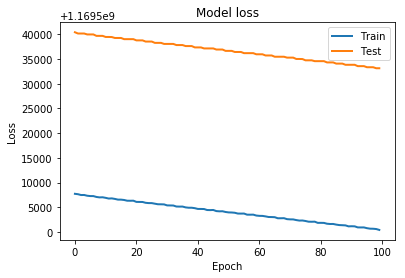

In [11]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

#Ermittlung potenzieller Kundenrisikogruppen# 
##Supervised Learning mit neuronalen Netzwerken##


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Laden der 600000 Transaktionsdaten 
trx_data_url = 'https://raw.githubusercontent.com/sakuronohana/cas_datenanalyse/master/Semesterarbeit/Dataset/trx_data_ml.csv'

trx_data_ml = pd.read_csv(trx_data_url, delimiter=';')
trx_data_ml.head()


In [0]:
trx_data_ol.nunique()

In [0]:
trx_data.fraud_id.map(lambda x:1 if x>=1 else 0).mean()

**Erstellung des neuronalen Netzwerk-Modells**

https://www.youtube.com/watch?v=BhpvH5DuVu8&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=46



In [0]:
import tensorflow as tf

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 10
batch_size = 1000

x = tf.placeholder('float',[None, 784])

def neural_network_model(data):
  hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784,n_nodes_hl1])),
                   'biases':tf.Variable(tf.random_normal(n_nodes_hl1))}
  hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl2])),
                   'biases':tf.Variable(tf.random_normal(n_nodes_hl2))}
  hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                   'biases':tf.Variable(tf.random_normal(n_nodes_hl3))}
  output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_nodes_hl1])),
                   'biases':tf.Variable(tf.random_normal(n_classes))}
  
  l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
  l1 = tf.nn.relu(l1)
  
  l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
  l2 = tf.nn.relu(l2)
  
  l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
  l3 = tf.nn.relu(l3)
                 
  output = tf.add(l3, output_layer['weights'])+ output_layer['biases']
  
  return output
                  
def train_neural_network(x):
  prediction = neural_network_model(x)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction,y))
  optimizer = tf.train.AdamOptimizer().minimize(cost)
  
  hm_epochs = 10
                  
  with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    # Hier wird das Modell trainiert
    for epoch in hm_epochs:
        epoch_loss = 0
        for _ in range(int(tdo_train.train.num_examples/batch_size)):
            x = tdo_train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict = {x: x})
            epoch_loss += c
        print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:', epoch_loss)
                  
    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct,'float'))
    print('Accuracy:', accuracy.eval({x:tdo_test}))
    
train_neural_network(x)

##Datensatz analysieren##

##Tipp: Plotting Learning Curves - Scikit !!!!

In [0]:
# Visualisierung der Nummerischen Daten in dem Datensatz
trx_data.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
# Suche nach den Korrelationen - Teil 1
corr_matrix = trx_data.corr()
print ('Korrelation zu Payment ID','\n',corr_matrix['paym_id'].sort_values(ascending=False))
print ('Korrelation zu Zahlungssumme','\n',corr_matrix['amount'].sort_values(ascending=False))
print ('Korrelation zu Kundenvertrag','\n',corr_matrix['cust_vertrag_nr'].sort_values(ascending=False))
print ('Korrelation zu Betrugsid','\n',corr_matrix['fraud_id'].sort_values(ascending=False))

In [0]:
# Bereinigung der Daten
pd.to_datetime(trx_data['timestamp'])
pd.to_datetime(trx_data['valuta_date'])
np.where(np.isnan(trx_data))

In [0]:
# Datensatz in Trainings(80%)- und Testdatenset (20%) teilen
from sklearn.model_selection import train_test_split
train_trx_data, test_trx_data = train_test_split(trx_data, test_size=0.2, random_state=42) 
train_trx_data.count(), test_trx_data.count()

In [0]:
# Dimensionsreduktion mit PCA
from sklearn.decomposition import PCA # Import der PCA Funktion von Scikit Learn
from sklearn import preprocessing # Die Preprocessing Funktion hilft uns die Daten zu skalieren bevor sie mit PCA verwendet werden.